Здравствуйте! В данной лабораторной работе Вы познакомитесь с FFT ([Fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform)), оно же БПФ ([Быстрое преобразование Фурье](https://ru.wikipedia.org/wiki/Быстрое_преобразование_Фурье)).

FFT/БПФ - это быстрый алгоритм вычисления DFT ([Discrete Fourier transform](https://en.wikipedia.org/wiki/Discrete_Fourier_transform)), оно же ДПФ ([Дискретное преобразование Фурье](https://ru.wikipedia.org/wiki/Дискретное_преобразование_Фурье)).

DFT/ДПФ позволяет разложить дискретный сигнал на сумму синосоид (с учётом амплитуды и фазы) и постоянного смещения.

Но использовать мы будем FFT/БПФ по одной простой причине - оно быстрое. Если в лоб применять DFT/ДПФ, получается $O(N^2)$, а если использовать FFT/БПФ - $O(N \log N)$.

Давайте посмотрим на FFT/БПФ на практике. Начнём со знакомых Вам импортов:

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

Нужно больше графиков!

In [ ]:
plt.rcParams["figure.figsize"] = [12.8, 4.8]

Начнём с простого: входные данные - одна синусоида, почти. Для удобства дальнейшего понимания будем использовать косинус, чтобы получать верную фазу. Пусть размер входного вектора будет 50, и за это время косинус делает 2 периода.

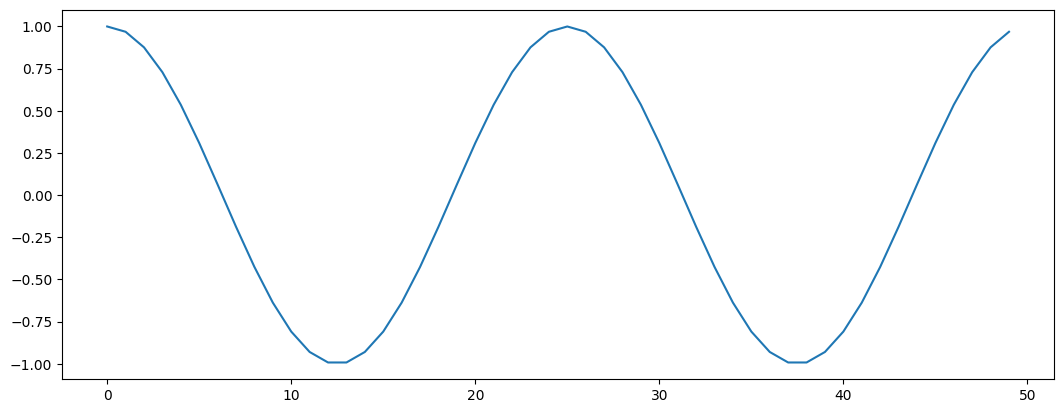

In [ ]:
fft_input = np.cos(0.08 * np.pi * np.arange(50))
plt.plot(fft_input)
plt.show()

Так как мы будем работать с действительными числами на входе, мы будем использовать функцию [numpy.fft.rfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html). На выходе мы получаем комплексные числа.

In [ ]:
fft_output = np.fft.rfft(fft_input)
print(fft_output.shape)
print(fft_output)

(26,)
[ 1.94289029e-15+0.00000000e+00j  3.36451532e-15-9.83367503e-16j
  2.50000000e+01+7.66779329e-15j -6.95852824e-16-1.34633246e-16j
 -1.12879195e-15+4.26777200e-16j -2.14932777e-15-7.70257612e-18j
 -1.01712414e-15-1.49071532e-15j  1.34412666e-15-2.23443329e-15j
  1.22358133e-15+2.08227068e-15j  8.90306619e-16+1.41006420e-15j
  1.01326108e-15+5.05958483e-16j  2.28588928e-16+2.66323660e-15j
 -2.06978730e-15-6.24773600e-16j  1.13458219e-16+4.90114218e-16j
  2.53485306e-16+9.17272323e-16j -2.70789796e-15+2.23639998e-16j
 -1.98750595e-16-1.89902768e-15j  7.32747746e-16-7.22032888e-16j
  4.48629988e-16-8.69919794e-16j  1.10080871e-15-8.44742956e-16j
 -4.18159343e-17+1.18821772e-15j  1.68921186e-15-2.46718394e-16j
 -1.09690383e-15-4.55030391e-16j  1.77635684e-15+3.25812483e-16j
  3.68865053e-16+1.58569598e-15j -3.05311332e-15+0.00000000e+00j]


Как видим, мы получили 26 чисел. Нулевое число соответствует постоянному смещению, остальные 25 чисел соответствует частотам косинусных составляющих сигнала с учётом размера входного вектора. Число $i$ соответствует частоте, при которой размер входного вектора соответствует $i$ периодам. Например, если частота дискретизации $10$ Гц, то для $i = 12$ получается частота $2.4$ Гц.

Также с определеним частот может помочь функция [numpy.fft.rfftfreq](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html):

In [ ]:
freqs = np.fft.rfftfreq(fft_input.size, d=1/10)
print(freqs)
print(freqs[12])

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5. ]
2.4000000000000004


Надеюсь, с индексами всё понятно. Но что означают эти числа? Посмотрим графики их действительных и мнимых частей.

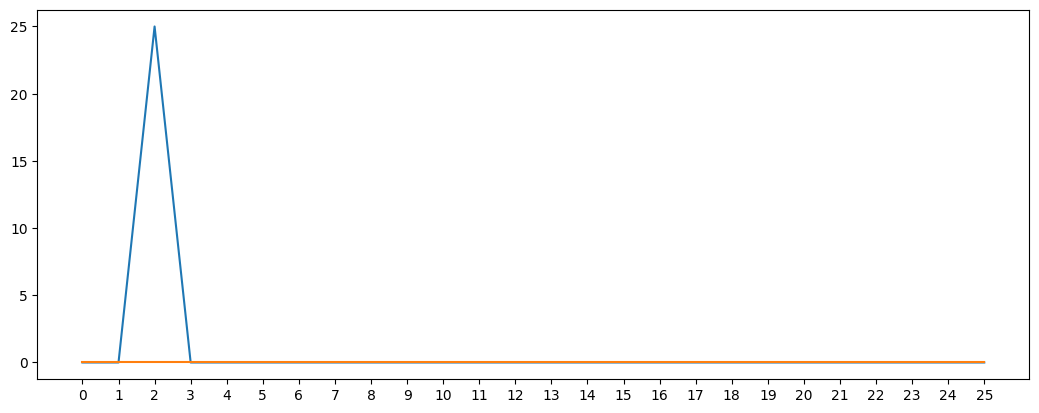

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.real(fft_output))
plt.plot(np.imag(fft_output))
plt.show()

Давайте попробуем сдвинуть косинус по фазе на $\pi / 4$ и посмотреть, что изменится:

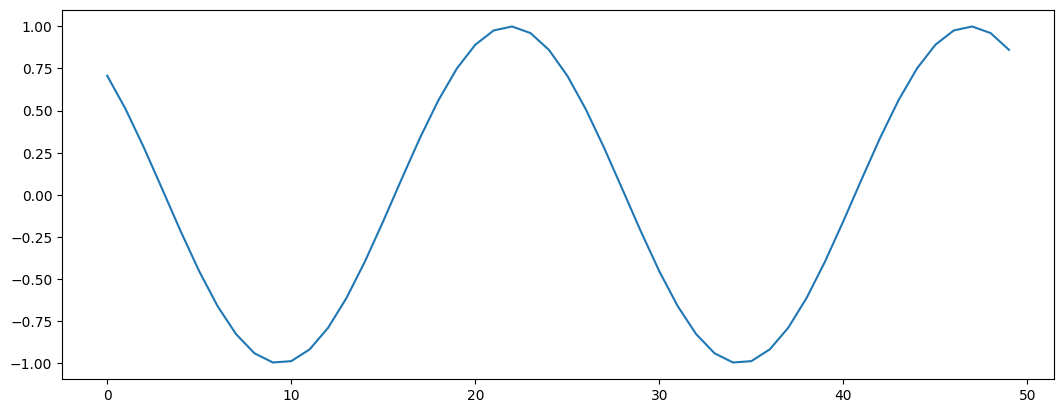

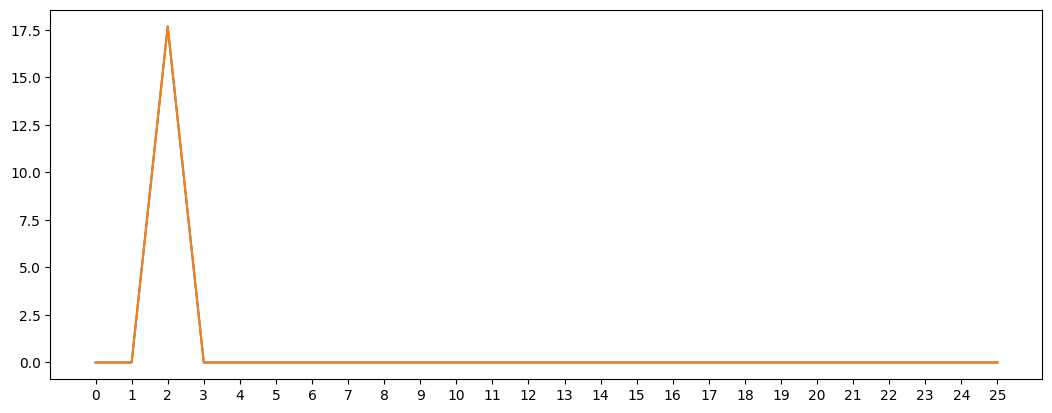

In [ ]:
fft_input = np.cos(0.25 * np.pi + 0.08 * np.pi * np.arange(50))
plt.plot(fft_input)
plt.show()
fft_output = np.fft.rfft(fft_input)
plt.xticks(np.arange(26))
plt.plot(np.real(fft_output))
plt.plot(np.imag(fft_output))
plt.show()

Соответственно, по отдельности действительные и мнимые части интереса не представляют. Давайте рассмотрим модули комплексных чисел:

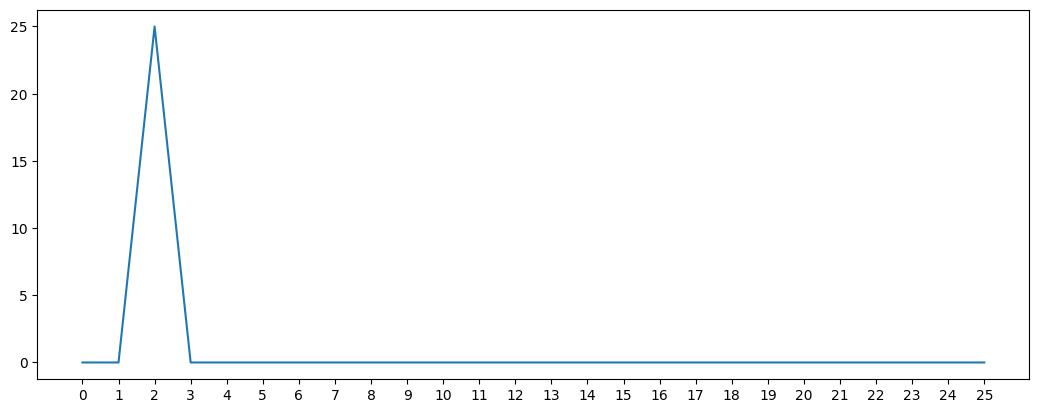

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output))
plt.show()

Модули комплексных чисел пропорциональны амплитудам косинусных составляющих входного сигнала. Чтобы получить амплитуды, нужно модули умножить на $2 / N$, где $N$ - размер входного вектора. Но при этом чтобы получить постоянное смещение, нужно модуль нулевого числа разделить на $N$.

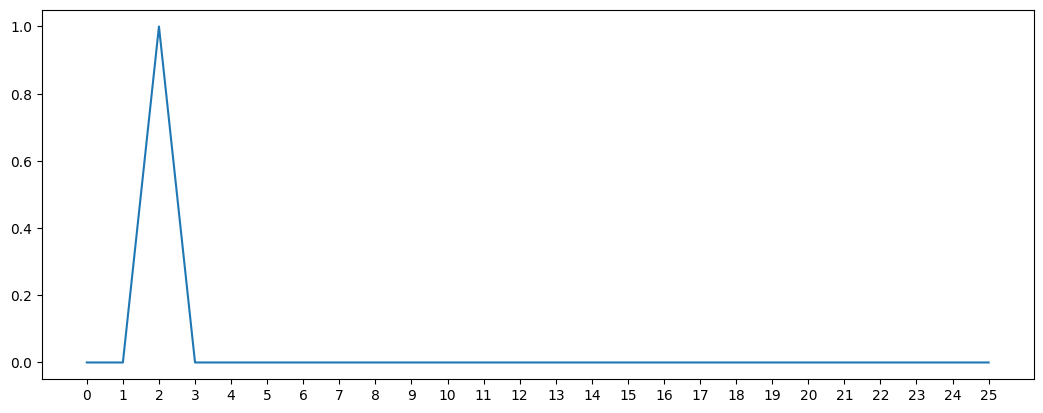

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output) * 2 / fft_input.size)
plt.show()

Теперь рассмотрим углы комплексных чисел - это фазы косинусных составляющих сигнала.

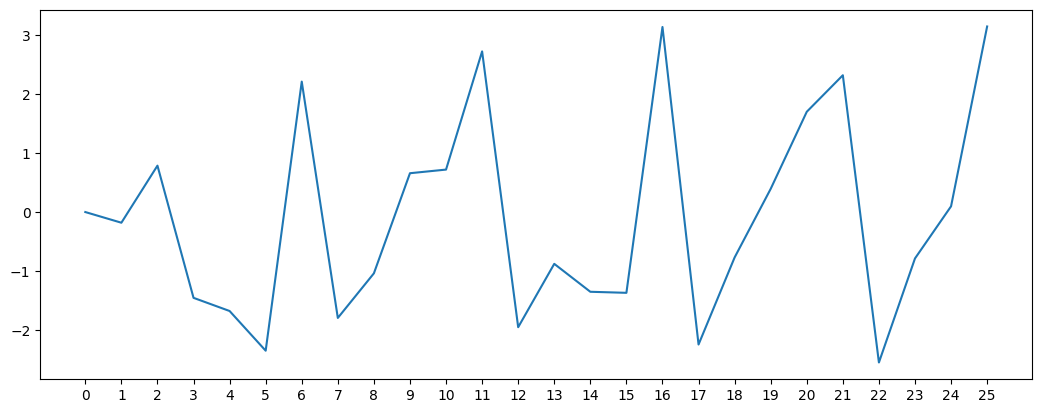

In [ ]:
plt.xticks(np.arange(26))
plt.plot(np.angle(fft_output))
plt.show()

Как можно заметить, график немного странный. Дело в том, что для около-нулевых комплексных чисел не получится нормально определить угол, поэтому нам эти углы не представляют интереса. Давайте посмотрим значение [2].

In [ ]:
np.angle(fft_output[2])

0.7853981633974486

Убедимся, что это действительно $\pi / 4$

In [ ]:
np.pi / 4

0.7853981633974483

Теперь давайте возьмём пример по-сложнее и посмотрим, как это работает.

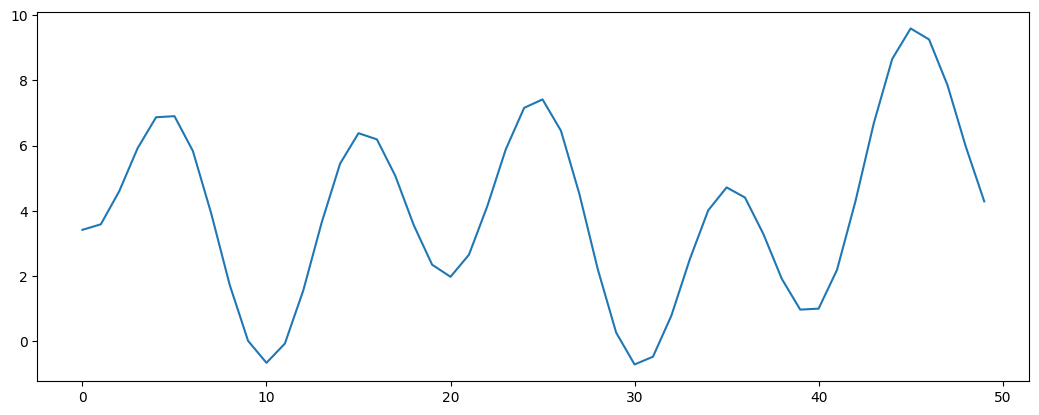

In [ ]:
fft_input = 4 # постоянное смещение
fft_input += 1 * np.cos(0.04 * np.pi * np.arange(50)) # 1 период без сдвига и амплитудой 1
fft_input += 2 * np.cos(0.25 * np.pi + 0.08 * np.pi * np.arange(50)) # 2 периода со сдвигом pi/4 и амплитудой 2
fft_input += 3 * np.cos(np.pi + 0.2 * np.pi * np.arange(50)) # 5 периодов с сдвигом pi и амплитудой 3
plt.plot(fft_input)
plt.show()

Посмотрим на результат работы FFT

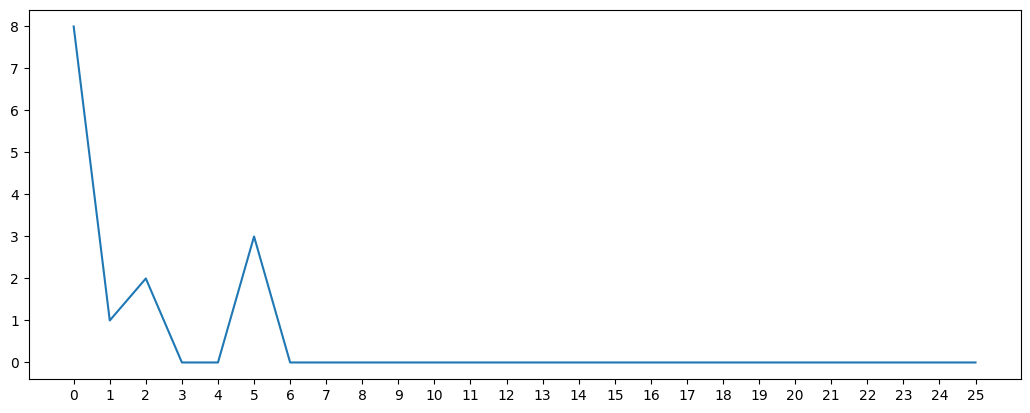

In [ ]:
fft_output = np.fft.rfft(fft_input)
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output) * 2 / fft_input.size)
plt.show()

Как можно заметить, амплитуды косинусных составлящих верные, а постоянное смещение ещё нужно поделить на 2, как это уже было описано выше. Посмотрим на фазы:

In [ ]:
print(np.angle(fft_output[1]), 0)
print(np.angle(fft_output[2]), np.pi / 4)
print(np.angle(fft_output[5]), np.pi)

1.0214051826551437e-16 0
0.7853981633974485 0.7853981633974483
3.1415926535897927 3.141592653589793


Всё совпадает с достаточной точностью.

Теперь рассмотрим обратное преобразование. Сначала модифицируем полученное разложение на частоты:

<ipython-input-18-f7f237fcef12>:3: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fft_output[12] = np.complex(new_r * np.cos(new_a), new_r * np.sin(new_a)) # добавим косинус на 12 периодов


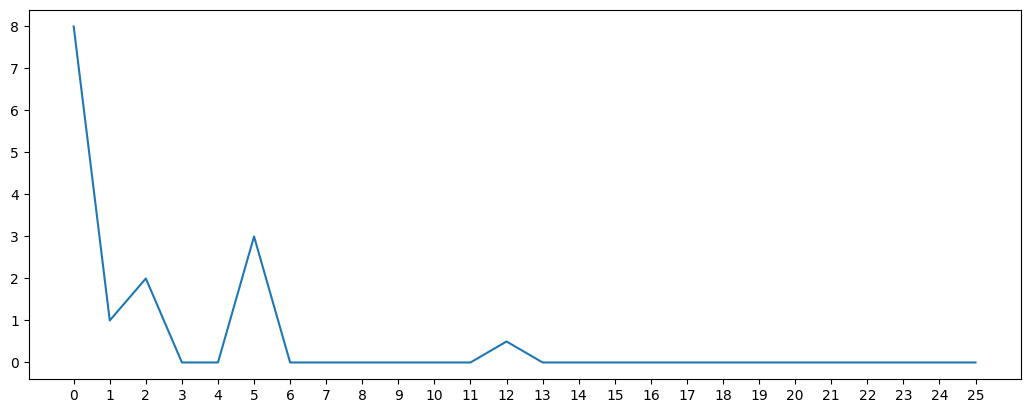

In [ ]:
new_r = 0.5 * fft_input.size / 2 # амплитуда 0.5
new_a = np.pi / 2 # сдвиг по фазе pi / 2
fft_output[12] = np.complex(new_r * np.cos(new_a), new_r * np.sin(new_a)) # добавим косинус на 12 периодов
plt.xticks(np.arange(26))
plt.plot(np.abs(fft_output) * 2 / fft_input.size)
plt.show()

Для обратного преобразования будем использовать функцию [numpy.fft.irfft](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft.html):

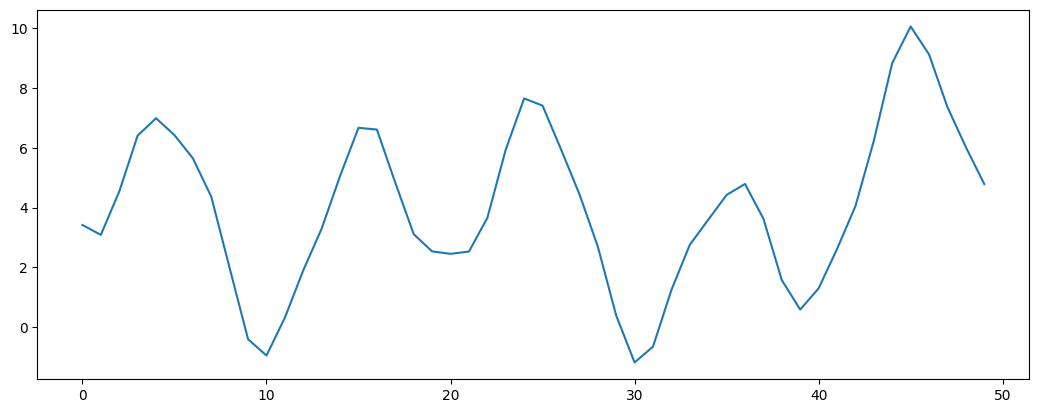

In [ ]:
ifft_output = np.fft.irfft(fft_output, fft_input.size)
plt.plot(ifft_output)
plt.show()

Видно, что что-то изменилось, но что явно - не видно. Давайте найдём разницу между получившимся вектором и изначальным:

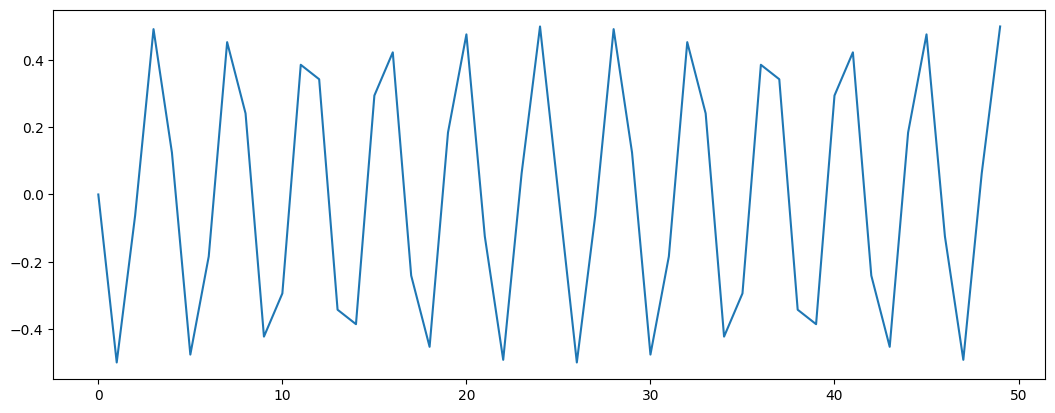

In [ ]:
plt.plot(ifft_output - fft_input)
plt.show()

Собственно, вот и наш косинус. Он получился такой из-за относительно низкой частоты дискретизации.

Теперь перейдём к заданию. У Вас есть некоторый датчик, который проводит какие-то измерения с частотой 500 Гц. Вы получили результаты измерений за 2 секунды, но на них значительно повлияли помехи от сети 50 Гц. Устраните помехи.

Пример данных:

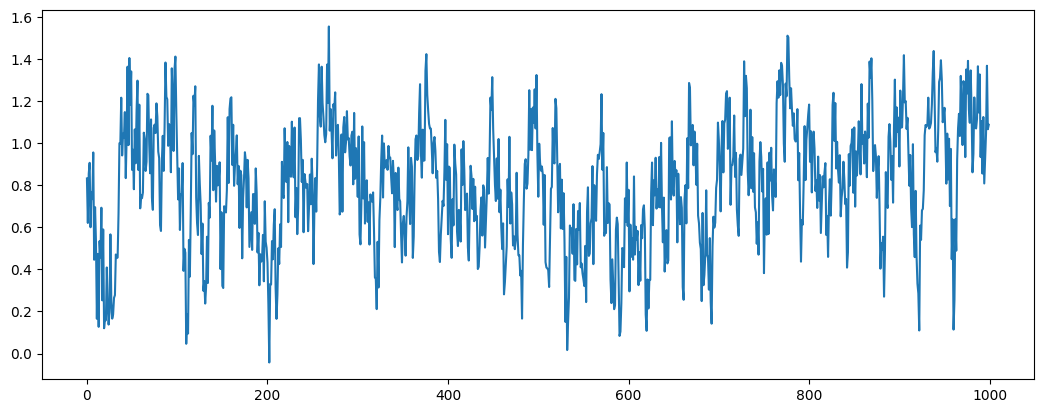

In [ ]:
rng = np.random.default_rng(seed=0)
data = np.interp(np.arange(1000), np.arange(100) * 10, rng.random(100)) + rng.random(1000) * 0.5
interference_a = 0.1 + 0.1 * rng.random()
interference_p = 2 * np.pi * rng.random()
interference = interference_a * np.sin(interference_p + 0.2 * np.pi * np.arange(1000))
measurements = data + interference
plt.plot(measurements)
plt.show()

Реализуйте функцию удаления помех:

In [ ]:
def remove_interference(measurements):
  n = measurements.size

  # Compute the fft
  fft = np.fft.rfft(measurements, n)

  # Why the full amplitude? And how exactly am I supposed to calculate only part of it?
  # frequency = i * sample_rate / measurement.size. Source: https://stackoverflow.com/questions/4364823/how-do-i-obtain-the-frequencies-of-each-value-in-an-fft
  sample_freq, noise_freq = 500, 50
  freq = int(noise_freq * measurements.size / sample_freq)
  fft[freq] -= fft[freq].real * (1) +  np.imag(fft[freq]) * 1j
  clean_data = np.fft.irfft(fft, n)

  """
  # The solution based on 'cleaning' all components whose power spectrum value is lower than a threshold
  # Source: https://www.sjsu.edu/people/burford.furman/docs/me120/FFT_tutorial_NI.pdf, page 6
  PSD = fft * np.conj(fft) / n

  # Keep only low power spectrums
  mask = PSD <= PSD[10] # <- this one
  fft = mask * fft

  # Inverse FFT
  clean_data = np.fft.irfft(fft)
  """

  return clean_data

Протестируйте её локально:

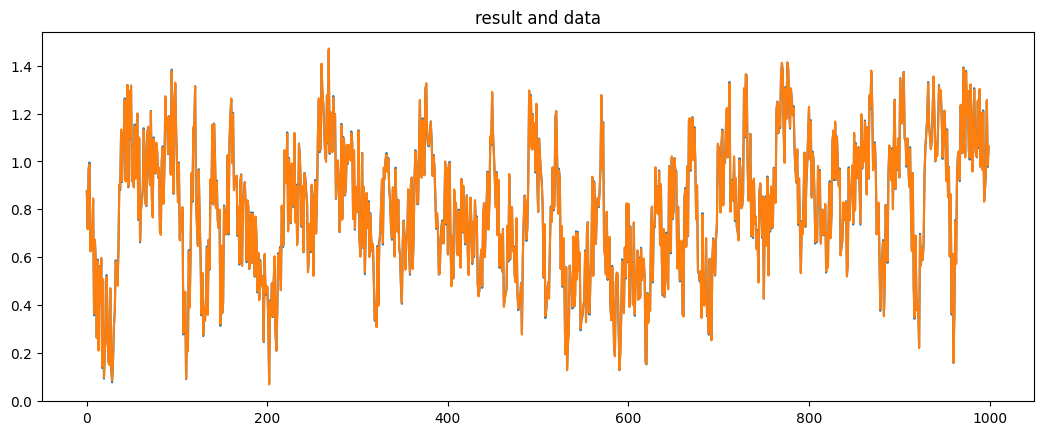

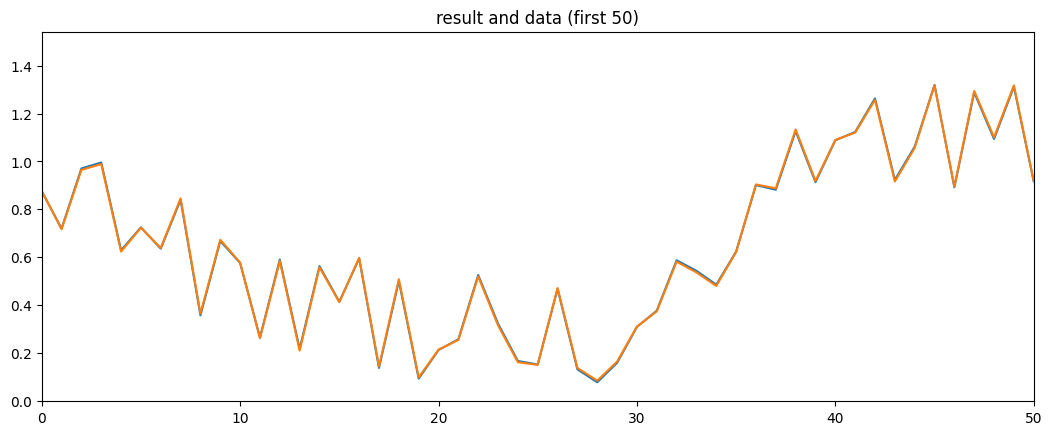

Difference: 0.004838062513171227


In [ ]:
result = remove_interference(measurements)
plt.title("result and data")
plt.plot(result)
plt.plot(data)
plt.show()
plt.plot()
plt.title("result and data (first 50)")
plt.plot(result)
plt.plot(data)
plt.xlim(0, 50)
plt.show()
print("Difference:", np.sqrt(np.mean((result - data) ** 2)))

Если Вам удалось добиться метрики Difference менее 0.005, то всё хорошо, можете переходить к автоматической проверке.




In [ ]:
auto_test(remove_interference)

Output hidden; open in https://colab.research.google.com to view.